## Calculating Descirptive Statistics

In [ ]:
# Import semua packages yang diperlukan
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [ ]:
# Mulai dengan list python yang berisi beberapa data numerik
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
print(x)
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [ ]:
# Buat objek np.array dan pd.Series yang sesuai dengan x dan x_with_nan
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(y)
print(y_with_nan)
print(z_with_nan)

[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


In [ ]:
mean_ = sum(x) / len(x)
mean_

8.7

In [ ]:
mean_ = statistics.mean(x)
print(mean_)

8.7


In [ ]:
mean_ = statistics.mean(x_with_nan)
print(mean_)

nan


In [ ]:
mean_ = np.mean(y)
mean_

8.7

In [ ]:
mean_ = y.mean()
mean_

8.7

In [ ]:
print(np.mean(y_with_nan))
print(y_with_nan.mean())

nan
nan


In [ ]:
np.nanmean(y_with_nan)

8.7

In [ ]:
mean_ = z.mean()
mean_

8.7

In [ ]:
z_with_nan.mean()

8.7

Weighted Mean

In [ ]:
0.2 * 2 + 0.5 * 4 + 0.3 * 8

4.8

In [ ]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
print(wmean)
wmean = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
print(wmean)

6.95
6.95


In [ ]:
y, z, w = np.array(x), pd.Series(x), np.array(w)

wmean = np.average(y, weights=w)
print(wmean)

wmean = np.average(z, weights=w)
print(wmean)

6.95
6.95


In [ ]:
(w * y).sum() / w.sum()

6.95

Harmonic Mean

In [ ]:
hmean = len(x) / sum(1 / item for item in x)
hmean

2.7613412228796843

In [ ]:
hmean = statistics.harmonic_mean(x)
hmean

2.7613412228796843

In [ ]:

scipy.stats.hmean(y)

2.7613412228796843

In [ ]:
scipy.stats.hmean(z)

2.7613412228796843

Geometric Mean

In [ ]:
gmean = 1

for item in x:
  gmean *= item

gmean **= 1 / len(x)
gmean

4.677885674856041

In [ ]:
scipy.stats.gmean(y)

4.67788567485604

In [ ]:
scipy.stats.gmean(z)

4.67788567485604

# Median

In [ ]:



n = len(x)
if n % 2:
  median_ = sorted(x)[round(0.5*(n-1))]
else:
  x_ord, index = sorted(x), round(0.5 * n)
  median_ = 0.5 * (x_ord[index-1] + x_ord[index])

median_

4

In [ ]:
x

[8.0, 1, 2.5, 4, 28.0]

In [ ]:
statistics.median_low(x[:-1])

2.5

In [ ]:

statistics.median_high(x[:-1])

4

In [ ]:
print(statistics.median(x_with_nan))
print(statistics.median_low(x_with_nan))
print(statistics.median_high(x_with_nan))

6.0
4
8.0


In [ ]:

median_ = np.median(y)
print(median_)

4.0


Mode

In [ ]:
u = [2, 3, 2, 8, 12]
v = [12, 15, 12, 15, 21, 15, 12]

mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

In [ ]:
mode_ = statistics.mode(u)
mode_

2

In [ ]:
u, v = np.array(u), np.array(v)

mode_ = scipy.stats.mode(u)
mode_

ModeResult(mode=2, count=2)

In [ ]:
mode_ = scipy.stats.mode(v)
mode_

ModeResult(mode=12, count=3)

In [ ]:
print(mode_.mode)
print(mode_.count)

12
3


In [ ]:
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2,math.nan])

print(u.mode())

print(v.mode())

print(w.mode())

0    2
dtype: int64
0    12
1    15
dtype: int64
0    2.0
dtype: float64


Measures of Variability

In [ ]:
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n-1)
var_

123.19999999999999

In [ ]:
var_ = statistics.variance(x)
var_

123.2

In [ ]:
var_ = np.var(y, ddof=1)
var_

123.19999999999999

In [ ]:
z.var(ddof=1)

123.19999999999999

Standar Deviation

In [ ]:
std_ = var_ ** 0.5
std_

11.099549540409285

In [ ]:
std_ = statistics.stdev(x)
std_

11.099549540409287

In [ ]:
np.std(y, ddof=1)

11.099549540409285

In [ ]:
y.std(ddof=1)

11.099549540409285

In [ ]:
z.std(ddof=1)

11.099549540409285

Skewness

In [ ]:
x = [8.0, 1, 2.5, 4, 28.0]
n = len(x)

mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n-1)
std_ = var_ ** 0.5

skew_ = (sum((item - mean_)**3 for item in x) * n / ((n-1) * (n - 2) * std_**3))

In [ ]:
skew_

1.9470432273905929

In [ ]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
scipy.stats.skew(y, bias=False)

1.9470432273905927

In [ ]:
scipy.stats.skew(y_with_nan, bias=False)

nan

In [ ]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
z.skew()

1.9470432273905924

In [ ]:
z_with_nan.skew()

1.9470432273905924

Percentiles

In [ ]:
>>> x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
>>> statistics.quantiles(x, n=2)

[8.0]

In [ ]:
>>> statistics.quantiles(x, n=4, method='inclusive')

[0.1, 8.0, 21.0]

In [ ]:
>>> y = np.array(x)
>>> np.percentile(y, 5)

-3.44

In [ ]:
>>> np.percentile(y, 95)

34.919999999999995

In [ ]:
>>> np.percentile(y, [25, 50, 75])


8.0

In [ ]:
>>> np.median(y)

8.0

In [ ]:
>>> y_with_nan = np.insert(y, 2, np.nan)
>>> y_with_nan

array([-5. , -1.1,  nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [ ]:
>>> np.nanpercentile(y_with_nan, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [ ]:
>>> np.quantile(y, 0.05)

-3.44

In [ ]:
>>> np.quantile(y, 0.95)

34.919999999999995

In [ ]:
>>> np.quantile, ([0.25, 0.5, 0.75])

(<function numpy.quantile(a, q, axis=None, out=None, overwrite_input=False, method='linear', keepdims=False, *, interpolation=None)>,
 [0.25, 0.5, 0.75])

In [ ]:
>>> np.nanquantile(y_with_nan, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [ ]:
>>> z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)
>>> z.quantile(0.05)

-3.44

In [ ]:
>>> z.quantile(0.95)

34.919999999999995

In [ ]:
>>> z.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

Ranges

In [ ]:
>>> np.ptp(y)

46.0

In [ ]:
>>> np.ptp(z)

46.0

In [ ]:
>>> np.ptp(y_with_nan)

nan

In [ ]:
>>> np.ptp(z_with_nan)

nan

In [ ]:
>>> np.amax(y) - np.amin(y)

46.0

In [ ]:
>>> np.nanmax(y_with_nan) - np.nanmin(y_with_nan)

46.0

In [ ]:
>>> y.max() - y.min()

46.0

In [ ]:
>>> z.max() - z.min()

46.0

In [ ]:
>>> z_with_nan.max() - z_with_nan.min()

46.0

In [ ]:
# Interquartile range
>>> quartiles = np.quantile(y, [0.25, 0.75])
>>> quartiles[1] - quartiles[0]

20.9

In [ ]:
>>> quartiles = z.quantile([0.25, 0.75])
>>> quartiles[0.75] - quartiles[0.25]

20.9

Summary of Descriptive Statistics

In [ ]:
>>> result = scipy.stats.describe(y, ddof=1, bias=False)
>>> result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

In [ ]:
>>> result.nobs

9

In [ ]:
>>> result.minmax[0] #Min

-5.0

In [ ]:
>>> result.minmax[1] #Max

41.0

In [ ]:
>>> result.mean

11.622222222222222

In [ ]:
result.variance

228.75194444444446

In [ ]:
result.skewness

0.9249043136685094

In [ ]:
result.kurtosis

0.14770623629658886

In [ ]:
result = z.describe()
result

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

In [ ]:
result['mean']

11.622222222222222

In [ ]:
result['std']

15.12454774346805

In [ ]:
result['min']

-5.0

In [ ]:
result['max']

41.0

In [ ]:
result['25%']

0.1

In [ ]:
result['50%']

8.0

In [ ]:
result['75%']

21.0

Measures of Correlation Between Pairs of Data

In [ ]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]

In [ ]:
x_, y_ = np.array(x), np.array(y)

In [ ]:
x__, y__ = pd.Series(x_), pd.Series(y_)

Covariance

In [ ]:
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range (n)) / (n-1))
cov_xy

19.95

In [ ]:
cov_matrix = np.cov(x_, y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [ ]:
x_.var(ddof=1)

38.5

In [ ]:
y_.var(ddof=1)

13.914285714285711

In [ ]:
cov_xy = cov_matrix[0, 1]
cov_xy

19.95

In [ ]:
cov_xy = cov_matrix[1, 0]
cov_xy

19.95

In [ ]:
cov_xy = x__.cov(y__)
cov_xy

19.95

In [ ]:
cov_xy = y__.cov(x__)
cov_xy

19.95

Correlation Coefficient

In [ ]:
var_x = sum((item - mean_x)**2 for item in x) / (n-1)
var_y = sum((item - mean_y)**2 for item in y) / (n-1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)
r

0.861950005631606

In [ ]:
r, p = scipy.stats.pearsonr(x_, y_)
r

0.8619500056316061

In [ ]:
p

5.122760847201132e-07

In [ ]:
corr_matrix = np.corrcoef(x_, y_)
corr_matrix

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

In [ ]:
r = corr_matrix[0, 1]
r

0.8619500056316061

In [ ]:
r = corr_matrix[1, 0]
r

0.861950005631606

In [ ]:
scipy.stats.linregress(x_, y_)

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201164e-07, stderr=0.06992387660074979, intercept_stderr=0.4234100995002589)

In [ ]:
result = scipy.stats.linregress(x_, y_)
r = result.rvalue
r

0.861950005631606

In [ ]:
r = x__.corr(y__)
r

0.8619500056316061

In [ ]:
r = y__.corr(x__)
r

0.861950005631606

Working with 2d Data

Axes

In [ ]:
a = np.array([[1, 1, 1],
             [2, 3, 1],
             [4, 9, 2],
             [8, 27, 4],
             [16, 1, 1]])
a

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [ ]:
np.mean(a)

5.4

In [ ]:
a.mean()

5.4

In [ ]:
np.median(a)

2.0

In [ ]:
a.var(ddof=1)

53.40000000000001

In [ ]:
np.mean(a, axis=0)

array([6.2, 8.2, 1.8])

In [ ]:
a.mean(axis=0)

array([6.2, 8.2, 1.8])

In [ ]:
np.mean(a, axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [ ]:
a.mean(axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [ ]:
np.median(a, axis=0)

array([4., 3., 1.])

In [ ]:
np.median(a, axis=1)

array([1., 2., 4., 8., 1.])

In [ ]:
a.var(axis=0, ddof=1)

array([ 37.2, 121.2,   1.7])

In [ ]:
a.var(axis=1, ddof=1)

array([  0.,   1.,  13., 151.,  75.])

In [ ]:
scipy.stats.gmean(a)

array([4.        , 3.73719282, 1.51571657])

In [ ]:
scipy.stats.gmean(a, axis=0)

array([4.        , 3.73719282, 1.51571657])

In [ ]:
scipy.stats.gmean(a, axis=1)

array([1.        , 1.81712059, 4.16016765, 9.52440631, 2.5198421 ])

In [ ]:
scipy.stats.gmean(a, axis=None)

2.829705017016332

In [ ]:
import scipy.stats

a = [2, 4, 8, 16, 32]
result = scipy.stats.gmean(a)
print(result)


7.999999999999998


In [ ]:
scipy.stats.describe(a, axis=None, ddof=1, bias=False)

DescribeResult(nobs=5, minmax=(2, 32), mean=12.4, variance=148.80000000000004, skewness=1.3253147098134046, kurtosis=1.3037634408602106)

In [ ]:
scipy.stats.describe(a, ddof=1, bias=False)

DescribeResult(nobs=5, minmax=(2, 32), mean=12.4, variance=148.80000000000004, skewness=1.3253147098134046, kurtosis=1.3037634408602106)

In [ ]:
scipy.stats.describe(a, axis=1, ddof=1, bias=False)

IndexError: ignored

In [ ]:
result = scipy.stats.describe(a, axis=1, ddof=1,bias=False)
result.mean

IndexError: ignored

DataFrames

In [ ]:
import pandas as pd

row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']

# Definisikan data yang akan digunakan untuk mengisi DataFrame
data = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12],
    [13, 14, 15]
]

df = pd.DataFrame(data, index=row_names, columns=col_names)
print(df)


         A   B   C
first    1   2   3
second   4   5   6
third    7   8   9
fourth  10  11  12
fifth   13  14  15


In [ ]:
df.mean()

A    7.0
B    8.0
C    9.0
dtype: float64

In [ ]:
df.mean(axis=1)

first      2.0
second     5.0
third      8.0
fourth    11.0
fifth     14.0
dtype: float64

In [ ]:
df['A']

first      1
second     4
third      7
fourth    10
fifth     13
Name: A, dtype: int64

In [ ]:
df['A'].mean()

7.0

In [ ]:
df['A'].var()

22.5

In [ ]:
df.values

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15]])

In [ ]:
df.to_numpy()

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15]])

In [ ]:
df.describe()

A          B          C
count   5.000000   5.000000   5.000000
mean    7.000000   8.000000   9.000000
std     4.743416   4.743416   4.743416
min     1.000000   2.000000   3.000000
25%     4.000000   5.000000   6.000000
50%     7.000000   8.000000   9.000000
75%    10.000000  11.000000  12.000000
max    13.000000  14.000000  15.000000

In [ ]:
df.describe().at['mean', 'A']

7.0

In [ ]:
df.describe().at['50%', 'B']

8.0

Visualizing Data

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Box Plots

In [ ]:
np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


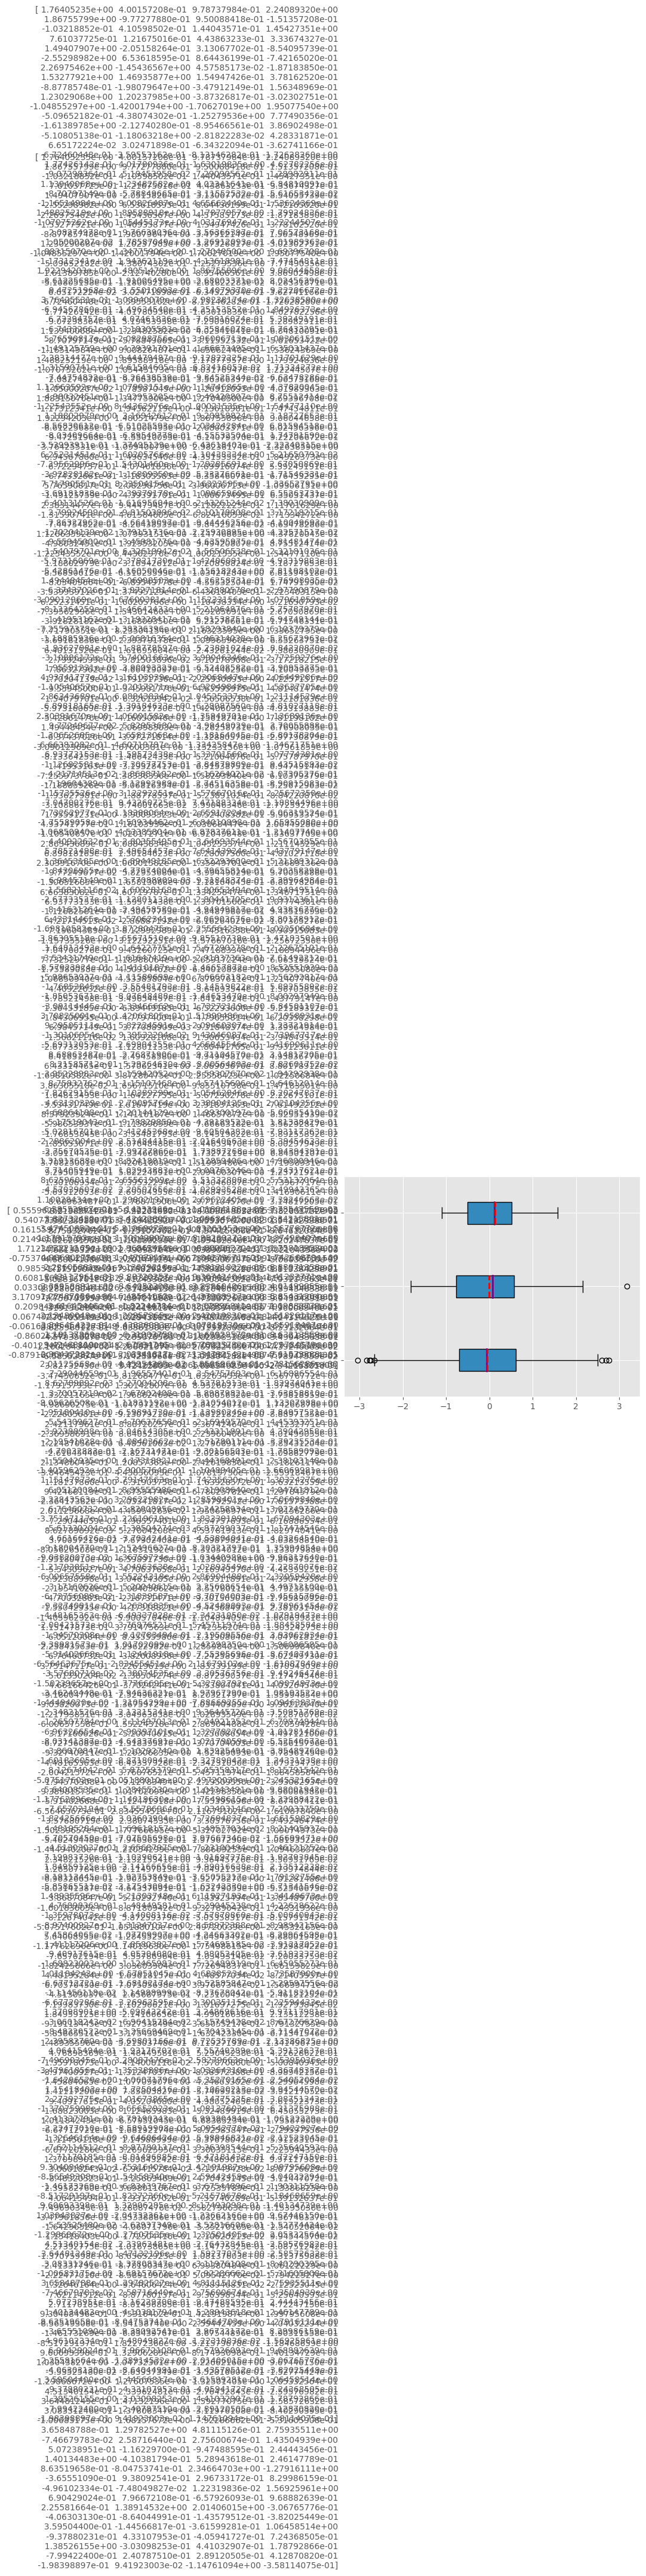

In [ ]:
fig, ax = plt.subplots()
ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True, labels=(x, y, x), patch_artist=True, medianprops=
           {'linewidth': 2, 'color': 'purple'}, meanprops=
           {'linewidth': 2, 'color': 'red'})
plt.show()

Histograms

In [ ]:
hist, bin_edges = np.histogram(x, bins=10)
hist

array([  9,  20,  70, 146, 217, 239, 160,  86,  38,  15])

In [ ]:
bin_edges

array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
       -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
        2.75935511])

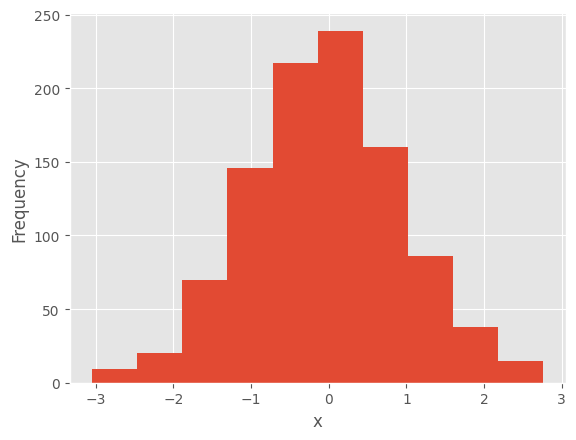

In [ ]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

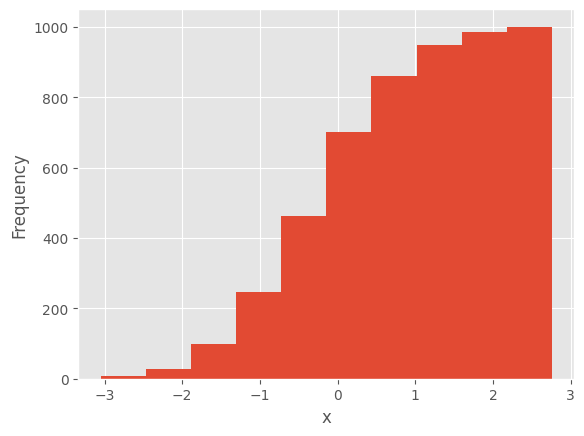

In [ ]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=True)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

Pie Charts

In [ ]:
x, y, z = 128, 256, 1024

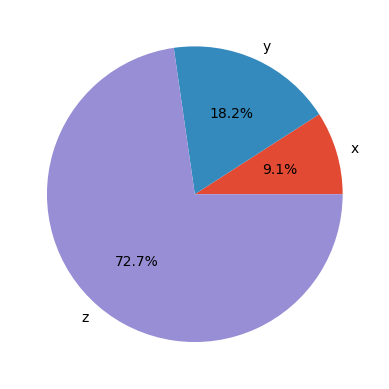

In [ ]:
fig, ax = plt.subplots()
ax.pie((x, y, z), labels=('x', 'y', 'z'), autopct='%1.1f%%')
plt.show()

Bar Charts

In [ ]:
x = np.arange(21)
y = np.random.randint(21, size=21)
err = np.random.randn(21)

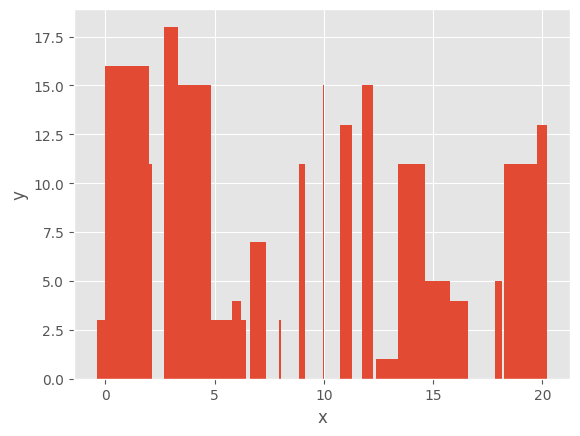

In [ ]:
fig, ax = plt.subplots()
ax.bar(x, y, err)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

X-Y Plots

In [ ]:
x = np.arange(21)
y = 5 + 2 * x + 2 * np.random.randn(21)
slope, intercept, r, *__ = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

<function matplotlib.pyplot.show(close=None, block=None)>

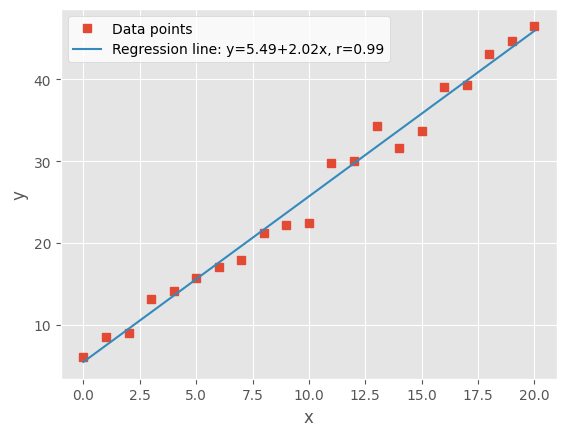

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

Heatmaps

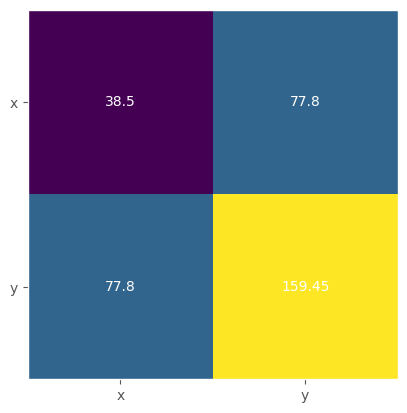

In [ ]:
matrix = np.cov(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0,1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
  for j in range(2): ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()

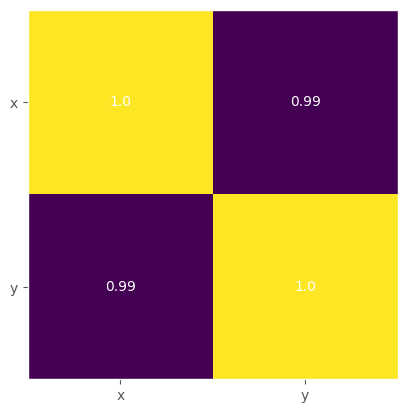

In [ ]:
matrix = np.corrcoef(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0,1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
  for j in range(2): ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()